## 5.1 분류와 회기
- 분류 : 타깃값이 범주형 데이터
- 회귀 : 타깃값이 수치형 데이터

### 5.1.1 분류 (Classification)
- 주어진 feature에 따라 대상을 유한한 범주로 구분하는 방법
- 이진분류 (binary classification) : 타깃값이 2개
- 다중분류 (multiclass classification) : 타깃값이 3개 이상

### 5.1.2 회귀 (Regression)
- 독립변수와 종속변수 간 관계 모델링
    - 종속변수는 수치형 데이터
- 독립변수 (independent variable) : 영향을 미치는 변수
- 종속변수 (dependent variable) : 영향을 받는 변수
- 단순 선형 회귀 (simple linear regression) : 독립변수 1 종속변수 1
- 다중 선형 회귀 (multiple linear regression) : 독립변수 여러개 종속변수 1
- 회귀 문제에서는 관계를 기반으로 최적의 회귀계수 (regression coefficient)를 찾아냄

#### 5.1.2.1 상관계수 (correlation coefficient)
- 상관관계 (correlation) 정도를 수치로 나타냄
- 피어슨 상관계수 (pearson correlation coefficient) : 
    - 강도 (strength)와 방향 (direction)
    - -1 < r < 1


## 5.2 회귀 평가지표
- MAE (Mean Absolute Error) : 평균 절대 오차 
- MSE (Mean squared Error) : 평균 제곱 오차
- RMSE (Root Mean Squared Error) : 평균 제곱근 오차
- MSLE (Mean Squared Log Error) : 타깃값에 log를 취한 MSE
    - log(y+1) : 로그값이 음의 무한대가 되는 상황을 방지
- RMSLE (Root Mean Squared Log Error) : MLSE에 제곱근을 취한 값
- R2 : 결정계수 (예측 타깃값의 분산 / 실제 타깃값의 분산)
    - 1에 가까울수록 좋은 성능

In [1]:
import numpy as np
from sklearn.metrics import mean_absolute_error, mean_squared_error, mean_squared_log_error, r2_score

In [2]:
true = np.array([1, 2, 3, 2, 3, 5, 4, 6, 5, 6, 7, 8, 8])
preds = np.array([1, 1, 2, 2, 3, 4, 4, 5, 5, 7, 7, 6, 8])

In [3]:
MAE = mean_absolute_error(true, preds)
MSE = mean_squared_error(true, preds)
RMSE = np.sqrt(MSE)
MSLE = mean_squared_log_error(true, preds)
RMSLE = np.sqrt(MSLE)
R2 = r2_score(true, preds)

In [4]:
print(f'MAE:\t {MAE:.4f}')
print(f'MSE:\t {MSE:.4f}')
print(f'RMSE:\t {RMSE:.4f}')
print(f'MSLE:\t {MSLE:.4f}')
print(f'RMSLE:\t {RMSLE:.4f}')
print(f'R2:\t {R2:.4f}')

MAE:	 0.5385
MSE:	 0.6923
RMSE:	 0.8321
MSLE:	 0.0296
RMSLE:	 0.1721
R2:	 0.8617


## 5.3 분류 평가지표

### 5.3.1 오차 행렬 (confusion matrix)
- 실제 타깃값과 예측한 타깃값이 어떻게 "매칭"되는지 표현
- T로 시작하면 올바른 예측, F로 시작하면 틀린 예측

![Alt text](image-1.png)

- 오차 행렬을 활용한 평가 지표는 값이 클 수록 좋음
    - 타깃 예측값은 이산값(discrete value)으로 구해야 함


#### 5.3.1.1 정확도 (accuracy)
**(TP + TN) / (TP + FP + FN + TN)**
- 실젯값과 에측값이 얼마나 일치되는지의 비율
- 높은 정확도가 모델의 우수성을 담보하지 않음
    - 평가지표로 잘 사용되지 않음

#### 5.3.1.1 정밀도 (precision)
**(TP) / (TP + FP)**
- 양성 예측의 정확도
- 음성을 양성으로 잘못 판단하면 문제가 발생하는 경우 사용
    - 양성 : 문제가 되는 상태
    - 음성 : 정상인 상태

#### 5.3.1.1 재현율 (recall)
**(TP) / (TP + FN)**
- 실제 양성값 중 양성으로 잘 예측한 비율
- 민감도 (sensitivity), 참 양성 비율 (true positive rate)와 같음
- 양성을 음성으로 잘못 판단하면 문제가 되는 경우 사용

#### 5.3.1.1 F1 점수
**2 * (precision * recall) / (precision + recall)**
- 정밀도와 재현율을 조합한 평가지표
- 정밀도와 재현율의 조화 평균으로 구함
    - 조화평균 : 주어진 수들의 역수의 평균의 역수

### 5.3.2 로그 손실

### 5.3.3 ROC 곡선과 AUC

## 5.4 데이터 인코딩 (data encoding)

### 5.4.1 레이블 인코딩 (label encoding)
- 범주형 데이터와 숫자의 1:1 매핑
- LabelEncoder : 1차원 데이터
- OrdinalEncoder : 2차원 데이터
- 단점 : 가까운 숫자를 비슷한 데이터라고 판단 => 원-핫 인코딩으로 해결

In [5]:
from sklearn.preprocessing import LabelEncoder

fruits = ['사과', '블루베리', '바나나', '귤', '블루베리', '바나나', '바나나', '사과']

label_encoder = LabelEncoder()
fruits_label_encoded = label_encoder.fit_transform(fruits)

# 사전 순으로 번호를 매김
print('레이블 인코딩 적용 후 데이터 : ', fruits_label_encoded)

레이블 인코딩 적용 후 데이터 :  [3 2 1 0 2 1 1 3]


### 5.4.2 원-핫 인코딩 (one-hot encoding)
- 여러 값 중 하나만 성화 하는 인코딩
    1. feature의 고윳값 개수
    2. 고윳값 개수만큼 열 추가
    3. 고윳값에 해당하는 열에 1표시, 나머지는 0
- 단점 : column이 지나치게 만아짐
- 해결 방법 : 
    1. 비슷한 고윳값끼리 그룹화
    2. 빈도가 낮은 고윳값끼리 '기타'로 그룹화
    3. 다른 인코딩 적용 (타깃 인코딩, 프리퀀시 인코딩 등)
* 교윳값 개수가 많아도 데이터 크기가 크지 않다면 그냥 원-핫 인코딩 적용

- pandas의 get_dummies와 같음

In [6]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

fruits = ['사과', '블루베리', '바나나', '귤', '블루베리', '바나나', '바나나', '사과']

label_encoder = LabelEncoder()
onehot_encoder = OneHotEncoder()

fruits_label_encoded = label_encoder.fit_transform(fruits)
fruits_onehot_encoded = onehot_encoder.fit_transform(fruits_label_encoded.reshape(-1, 1))

# 대부분의 값이 0인 희소행렬은 메모리 낭비가 심함 => 압축형태인 CSR (Compressed Sparse Row) 행렬로 반환
print(fruits_onehot_encoded)

# toarray() : CSR 행열을 일반 배열로 바꿔줌
print('원-핫 인코딩 적용 후 데이터 : \n', fruits_onehot_encoded.toarray())

  (0, 3)	1.0
  (1, 2)	1.0
  (2, 1)	1.0
  (3, 0)	1.0
  (4, 2)	1.0
  (5, 1)	1.0
  (6, 1)	1.0
  (7, 3)	1.0
원-핫 인코딩 적용 후 데이터 : 
 [[0. 0. 0. 1.]
 [0. 0. 1. 0.]
 [0. 1. 0. 0.]
 [1. 0. 0. 0.]
 [0. 0. 1. 0.]
 [0. 1. 0. 0.]
 [0. 1. 0. 0.]
 [0. 0. 0. 1.]]


In [7]:
import pandas as pd

pd.get_dummies(fruits)

,귤,바나나,블루베리,사과
0,0,0,0,1
1,0,0,1,0
2,0,1,0,0
3,1,0,0,0
4,0,0,1,0
5,0,1,0,0
6,0,1,0,0
7,0,0,0,1


## 5.5 피처 스케일링 (feature scaling)
- 서로 다른 feature 값의 범위 (max-min)이 일치하도록 조정
- 트리 기반 모델은 feature scaling이 필요 없음 (random forest, XGBoost, LightGBM)
    - 대소 관계에 영향을 받기 때문

### 5.5.1 min-max 정규화 (min-max normalization)
- feature 값의 범위를 0 ~ 1로 조정

    **(x - xmin) / (xmax - xmin)**
- 이상치가 너무 크거나 작을 때느 표준화 권장

In [8]:
import pandas as pd

height_weight_dict = {'키' : [1.7, 1.5, 1.8], '몸무게' : [75, 55, 60]}
df = pd.DataFrame(height_weight_dict, index=['광일', '혜성', '덕수'])
print(df)

      키  몸무게
광일  1.7   75
혜성  1.5   55
덕수  1.8   60


In [9]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

# df_scaled = scaler.fit_transform(df)

# 한 데이터에 맞춰놓은 스케일링 범위를 다른 데이터에도 적용하려면 fit과 transform을 분리
scaler.fit(df)
df_scaled = scaler.transform(df)

print(df_scaled)

[[0.66666667 1.        ]
 [0.         0.        ]
 [1.         0.25      ]]


### 5.5.2 표준화 (standardization)
- 평균이 0, 분산이 1이 되도록 feature 값 조정

    **(x-average) / standard deviation**

- 상한, 하한을 따로 정해야 하는 경우가 아니라면 적용
- 정규분포를 따르는 데이터는 표준화 권장


In [10]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

df_scaled = scaler.fit_transform(df)

print(df_scaled)

[[ 0.26726124  1.37281295]
 [-1.33630621 -0.98058068]
 [ 1.06904497 -0.39223227]]


## 5.6 교차검증
- 이유 : 
    1. 모델이 과대적합될 가능성이 있음
    2. 제출 전까지 모델 성능 확인이 어려움

### 5.6.1 K 폴드 교차검증 (K-Fold Cross Validation)
1. 전체 훈련 데이터를 K개로 나눔
2. 하나는 검증 데이터, 나머지는 훈련 데이터로 지정
3. 훈련 데이터로 모델을 훈련하고 검증 데이터로 평가
4. 평가점수 기록
5. 검증 데이터를 바꿔가며 2-4 반복
6. K개의 검증 평가점수의 평균을 구함

- 데이터의 편향 분포를 방지하기 위해 폴드로 나누기 전 데이터를 섞어주는 것이 좋음

In [18]:
import numpy as np
from sklearn.model_selection import KFold

data = np.array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

#folds = KFold(n_splits=5, shuffle=False)
folds = KFold(n_splits=5, shuffle=True)

for train_idx, valid_idx in folds.split(data) :
    print(f'훈련 데이터 : {data[train_idx]}, 검증 데이터 : {data[valid_idx]}')

훈련 데이터 : [0 2 4 5 6 7 8 9], 검증 데이터 : [1 3]
훈련 데이터 : [0 1 3 5 6 7 8 9], 검증 데이터 : [2 4]
훈련 데이터 : [1 2 3 4 6 7 8 9], 검증 데이터 : [0 5]
훈련 데이터 : [0 1 2 3 4 5 7 9], 검증 데이터 : [6 8]
훈련 데이터 : [0 1 2 3 4 5 6 8], 검증 데이터 : [7 9]


### 5.6.2 층화 K 폴드 교차검증 (Stratified K-Fold Cross Validation)
- 타깃값이 불균형하게 분포되어 있는 경우 사용
- 분류 문제에서만 쓰임
    - 회귀 문제의 타깃값은 연속된 값이라서 폴드마다 균등한 비율로 나누는 것이 불가능
- StratifiedKFold의 split()함수에는 feature와 타깃값 모두를 전달 해야함

In [15]:
# '스팸'이 들어있지 않은 폴드 존재 => 층화 K 폴드 사용

y = np.array(['스팸']*5 + ['일반']*45)

folds = KFold(n_splits=5, shuffle=True)

for idx, (train_idx, valid_idx) in enumerate(folds.split(y)) :
    print(f'Fold {idx+1} 검증 데이터 타깃 값 : ')
    print(y[valid_idx], '\n')

Fold 1 검증 데이터 타깃 값 : 
['일반' '일반' '일반' '일반' '일반' '일반' '일반' '일반' '일반' '일반'] 

Fold 2 검증 데이터 타깃 값 : 
['스팸' '일반' '일반' '일반' '일반' '일반' '일반' '일반' '일반' '일반'] 

Fold 3 검증 데이터 타깃 값 : 
['스팸' '스팸' '일반' '일반' '일반' '일반' '일반' '일반' '일반' '일반'] 

Fold 4 검증 데이터 타깃 값 : 
['스팸' '일반' '일반' '일반' '일반' '일반' '일반' '일반' '일반' '일반'] 

Fold 5 검증 데이터 타깃 값 : 
['스팸' '일반' '일반' '일반' '일반' '일반' '일반' '일반' '일반' '일반'] 



In [17]:
from sklearn.model_selection import StratifiedKFold

X = np.array(range(50))
y = np.array(['스팸']*5 + ['일반']*45)

folds = StratifiedKFold(n_splits=5)

for idx, (train_idx, valid_idx) in enumerate(folds.split(X, y)) :
    print(f'Fold {idx+1} 검증 데이터 타깃 값 : ')
    print(y[valid_idx], '\n')

Fold 1 검증 데이터 타깃 값 : 
['스팸' '일반' '일반' '일반' '일반' '일반' '일반' '일반' '일반' '일반'] 

Fold 2 검증 데이터 타깃 값 : 
['스팸' '일반' '일반' '일반' '일반' '일반' '일반' '일반' '일반' '일반'] 

Fold 3 검증 데이터 타깃 값 : 
['스팸' '일반' '일반' '일반' '일반' '일반' '일반' '일반' '일반' '일반'] 

Fold 4 검증 데이터 타깃 값 : 
['스팸' '일반' '일반' '일반' '일반' '일반' '일반' '일반' '일반' '일반'] 

Fold 5 검증 데이터 타깃 값 : 
['스팸' '일반' '일반' '일반' '일반' '일반' '일반' '일반' '일반' '일반'] 



## 5.7 주요 머신러닝 모델

### 5.7.1 선형 회귀 모델 (Linear Regression Model)
- 훈련 데이터에 잘 맞는 회귀계수를 찾는 것

#### 5.7.1.1 데이터 생성

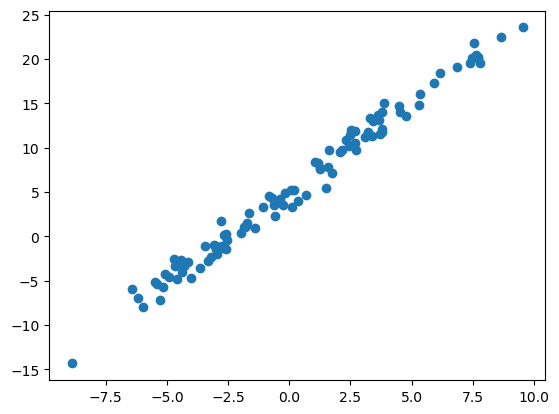

In [22]:
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(0)

w0 = 5
w1 = 2
noise = np.random.randn(100,1)

x = 4 * np.random.randn(100,1)
y = w1*x  + w0 + noise
plt.scatter(x, y)

#### 5.7.1.2 모델 훈련

In [23]:
from sklearn.linear_model import LinearRegression

linear_reg_model = LinearRegression()
linear_reg_model.fit(x, y)

print('y절편(w0):', linear_reg_model.intercept_)
print('회귀계수(w1):', linear_reg_model.coef_)

y절편(w0): [5.05088198]
회귀계수(w1): [[2.02720921]]


#### 5.7.1.2 회귀선 확인

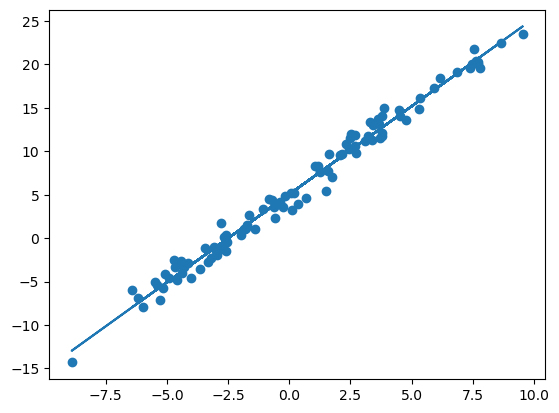

In [25]:
y_pred = linear_reg_model.predict(x)

plt.scatter(x, y)
plt.plot(x, y_pred)

#### 5.7.2 로지스틱 회귀 모델 (Logistic Regression)
- 이진 분류문제에 사용 (이름때문에 회귀문제에 사용될 것 같지만 분류에 쓰임)
- 시그모이드 함수 (Sigmoid Function)으로 타깃값에 포함될 확률을 예측
- p < 0.5 면 0(음성), p >= 0.5 면 1(양성)

#### 5.7.3 결정 트리 (Decision Tree)
- 분류와 회귀 문제 모두 사용 가능
- 분할 조건이 중요함
    - 데이터 분할 조건에 따라 트리 모양과 효율이 달라짐
    - 불순도를 최소화하는 방향으로 분할
- 불순도 (Impurity) : 한 범주 안에 서로 다른 데이터가 얼마나 섞여 있는지의 정도
    - 엔트로피 (Entropy) : 불확실한 정도 (값이 클수록 높은 불순도, 작을수록 낮은 불순도)
    - 정보 이득 (Information Gain) : 1- 엔트로피 
    - 지니 불순도 (Gini Impurity) : 값이 클수록 높은 불순도, 작을수록 낮은 불순도

#### 5.7.4 앙상블 학습 (Ensemble Learning)
- 다양한 모델이 내린 예측 결과를 결합하는 기법
- 보팅 (Voting) : 개별 결과를 종합해 최종 결과를 결정
    - 하드 보팅 (Hard Voting) : 다수결 투표
    - 소프트 보팅 (Soft Voting) : 개별 예측 **확률**들의 평균
- 배깅 (Bagging) : 개별 모델이 서로 다른 샘플링 데이터를 활용
    - ex) 랜덤 포레스트

#### 5.7.5 랜덤 포레스트 (Random Forest)
- 결정트리를 배깅 방식으로 결합한 모델
- 분류와 회귀 모두 적용 가능

#### 5.7.6 XGBoost
- 트리 기반 부스팅 알고리즘
- 직렬로 배치하여 직전 트리가 예측한 값을 다음 트리가 활용하여 예측값 수정
- 전용 데이터셋 : DMatrix()

#### 5.7.7 LightGBM
- XGBoost보다 훈련 속도가 더 빠름
- 말단 노드 중심으로 예측 오류를 최소화하도록 분할
    - 균형을 맞추기 위한 추가 연산 필요 없음 -> 빠름
- 단점 : 데이터 개수가 적을 때 과대적합되기 쉬움
    - 과대적합 방지용 하이퍼파라미터 조정
- 전용 데이터셋 : Dataset()

## 5.8 하이퍼파라미터 최적화

### 5.8.1 그리드서치 (Greed Search)
- 주어진 하이퍼 하라미터를 모두 순회하는 기법
- 단점 : 시간이 오래걸림

### 5.8.2 랜덤서치 (Random Search)
- 하이퍼파라미터를 무작위로 탐색하는 기법
- 단점 : 무작위라는 한계, 사용 빈도가 적음

### 5.8.3 베이지안 최적화 (Bayesian Optimization)
- 사전 정보를 바탕으로 최적 하이퍼파라미터 값을 확률적으로 추정하며 탐색하는 기법
- 수행 절차 : 
    1. 하이퍼파라미터 탐색 범위 설정 (딕셔너리; 하이퍼파라미터 이름 : 범위)
    2. 평가지표 계산 함수 (성능 평가 함수) 정의 (하이퍼파라미터를 인수로 받음)
    3. Bayesian Optimization 객체 생성
    4. 베이지안 최적화 수행 (maximize() 메서드 호출)